In [452]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

In [453]:
df = pd.read_csv("time_series_ass3.csv")

In [454]:
print(df.columns)

Index(['Unnamed: 0', 'From', 'To (Interval: 15M)', 'PM10 (µg/m3)',
       'PM2.5 (µg/m3)', 'NO (µg/m3)'],
      dtype='object')


In [455]:
df

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN
...,...,...,...,...,...,...
8635,8635,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9
8636,8636,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9
8637,8637,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6
8638,8638,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8


In [456]:
df.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [458]:
df.nunique()

Unnamed: 0            8640
From                  8640
To (Interval: 15M)    8640
PM10 (µg/m3)           375
PM2.5 (µg/m3)          244
NO (µg/m3)             774
dtype: int64

In [459]:
df.shape

(8640, 6)

In [460]:
df.isnull().sum()

Unnamed: 0               0
From                     0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
dtype: int64

### Pre-Prossessing of Data

In [461]:
df.columns = df.columns.str.strip()
df['From'] = pd.to_datetime(df['From'])
df['To (Interval: 15M)'] = pd.to_datetime(df['To (Interval: 15M)'])
df = df.set_index('From')
df.head()

,Unnamed: 0,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,,
2023-02-01 00:00:00,0,2023-02-01 00:15:00,95.0,35.0,NaN
2023-02-01 00:15:00,1,2023-02-01 00:30:00,95.0,35.0,NaN
2023-02-01 00:30:00,2,2023-02-01 00:45:00,95.0,35.0,NaN
2023-02-01 00:45:00,3,2023-02-01 01:00:00,122.0,34.0,NaN
2023-02-01 01:00:00,4,2023-02-01 01:15:00,122.0,34.0,NaN


In [462]:
df_resampled = df.resample('15T').mean()
display(df_resampled.head())

C:\Users\suyas\AppData\Local\Temp\ipykernel_25360\1374135144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('15T').mean()


,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,
2023-02-01 00:00:00,0.0,95.0,35.0,NaN
2023-02-01 00:15:00,1.0,95.0,35.0,NaN
2023-02-01 00:30:00,2.0,95.0,35.0,NaN
2023-02-01 00:45:00,3.0,122.0,34.0,NaN
2023-02-01 01:00:00,4.0,122.0,34.0,NaN


In [463]:
sns.set_style('whitegrid')

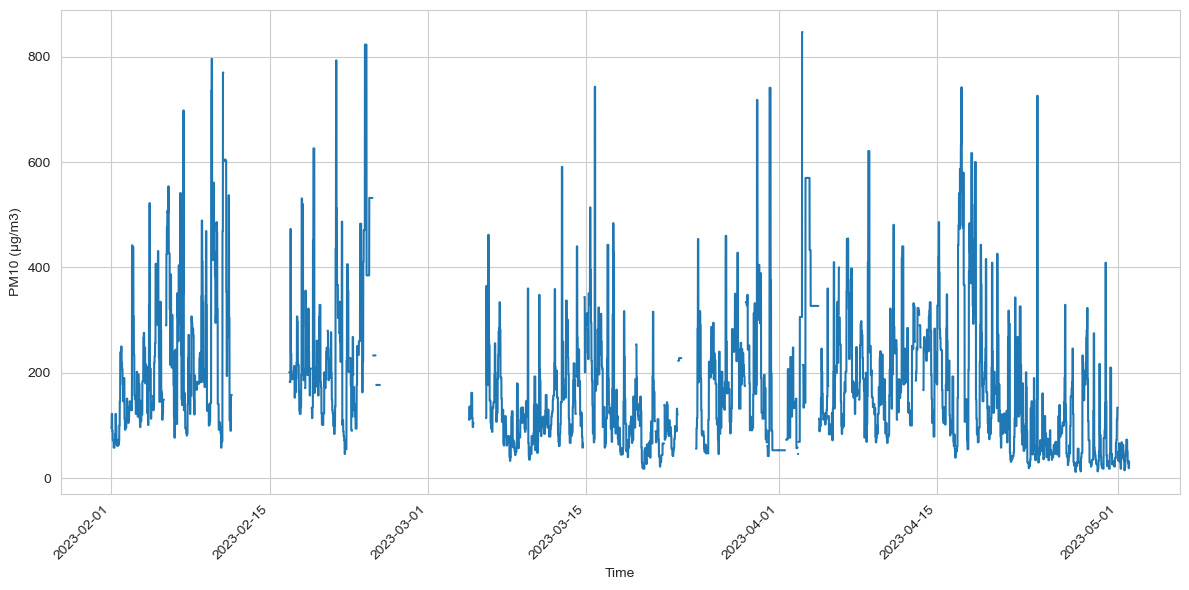

In [464]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['PM10 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM10 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

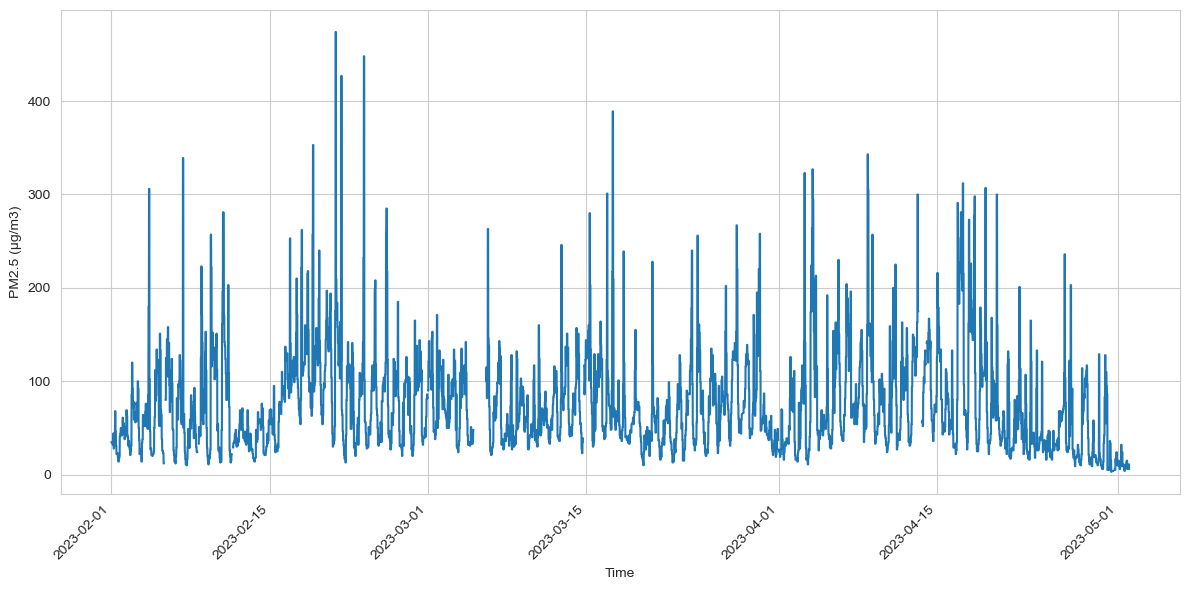

In [465]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['PM2.5 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

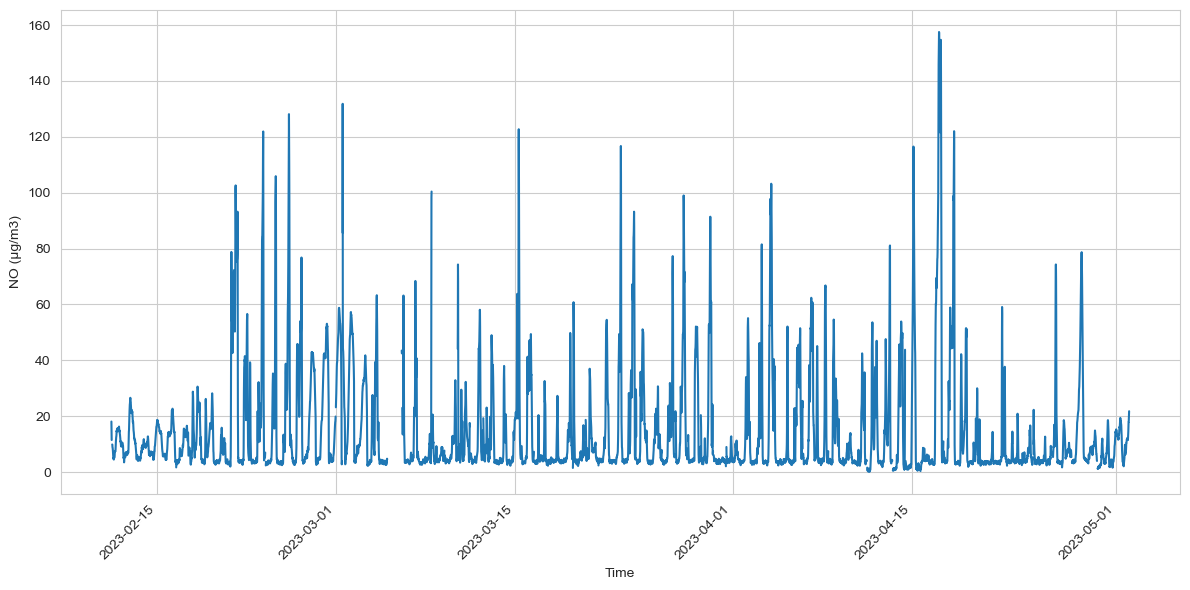

In [466]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['NO (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('NO (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [467]:
df_filled.isnull().sum()

Unnamed: 0         3
PM10 (µg/m3)       3
PM2.5 (µg/m3)      3
NO (µg/m3)       903
dtype: int64

In [468]:
df.describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8640.000000,6959.000000,8414.000000,7271.000000
mean,4319.500000,181.408679,75.690397,14.649636
std,2494.297496,136.016142,55.245265,19.221385
min,0.000000,12.000000,3.000000,0.100000
25%,2159.750000,84.000000,36.000000,3.900000
50%,4319.500000,145.000000,61.000000,6.100000
75%,6479.250000,238.000000,101.000000,16.500000
max,8639.000000,847.000000,474.000000,157.500000


In [469]:
df_filled.describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8261.000000,8261.000000,8261.000000,7361.000000
mean,4350.103135,159.163955,72.855042,13.797921
std,2485.248823,90.355197,51.796637,17.166411
min,0.000000,12.000000,3.000000,0.100000
25%,2268.000000,94.000000,36.000000,3.900000
50%,4353.000000,146.000000,59.000000,6.000000
75%,6494.000000,200.000000,98.000000,15.900000
max,8639.000000,454.400000,474.000000,131.800000


## PM10 (µg/m3)

In [470]:
Q1 = df_filled['PM10 (µg/m3)'].quantile(0.25)
Q3 = df_filled['PM10 (µg/m3)'].quantile(0.80)

IQR = Q3 - Q1
IQR

129.0

In [471]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-99.5, 416.5)

In [472]:
df_filled[(df_filled['PM10 (µg/m3)']<lower_limit)|(df_filled['PM10 (µg/m3)']>upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,123.000000,123.000000,123.000000,87.000000
mean,4113.943089,436.048238,143.130081,29.427586
std,2765.929252,9.802960,83.765183,26.308000
min,175.000000,418.000000,41.000000,3.500000
25%,873.500000,428.000000,102.000000,6.250000
50%,4979.000000,436.000000,120.000000,24.800000
75%,6715.500000,442.000000,160.000000,47.100000
max,7522.000000,454.400000,474.000000,116.500000


In [473]:
df_filled[(df_filled['PM10 (µg/m3)']>lower_limit)&(df_filled['PM10 (µg/m3)']<upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8138.000000,8138.000000,8138.000000,7274.000000
mean,4353.672524,154.979049,71.792885,13.610984
std,2480.779393,84.318664,50.422855,16.943131
min,0.000000,12.000000,3.000000,0.100000
25%,2282.250000,94.000000,36.000000,3.900000
50%,4352.500000,145.000000,59.000000,5.900000
75%,6486.750000,196.984600,97.000000,15.600000
max,8639.000000,416.000000,427.000000,131.800000


In [474]:
df_filled_1 = df_filled[(df_filled['PM10 (µg/m3)'] > lower_limit) & (df_filled['PM10 (µg/m3)'] < upper_limit)]

## PM2.5 (µg/m3)

In [475]:
Q1 = df_filled['PM2.5 (µg/m3)'].quantile(0.25)
Q3 = df_filled['PM2.5 (µg/m3)'].quantile(0.80)

IQR = Q3 - Q1
IQR

72.0

In [476]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-72.0, 216.0)

In [477]:
df_filled[(df_filled['PM2.5 (µg/m3)']<lower_limit)|(df_filled['PM2.5 (µg/m3)']>upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,193.000000,193.000000,193.000000,177.000000
mean,4435.404145,263.345336,273.709845,46.793785
std,2268.161224,101.021517,55.197644,33.207713
min,319.000000,66.000000,217.000000,4.500000
25%,2139.000000,171.849206,230.000000,19.700000
50%,4928.000000,246.000000,258.000000,36.300000
75%,6420.000000,329.000000,300.000000,69.300000
max,8094.000000,451.000000,474.000000,128.100000


In [478]:
df_filled[(df_filled['PM2.5 (µg/m3)']>lower_limit)&(df_filled['PM2.5 (µg/m3)']<upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8064.000000,8064.000000,8064.000000,7180.000000
mean,4346.740947,156.586779,67.976873,12.967006
std,2490.213269,88.543386,40.942199,15.714791
min,0.000000,12.000000,3.000000,0.100000
25%,2269.750000,92.000000,36.000000,3.800000
50%,4341.500000,144.916667,58.000000,5.700000
75%,6499.250000,197.000000,94.000000,14.900000
max,8639.000000,454.400000,215.000000,131.800000


In [479]:
df_filled_2 = df_filled[(df_filled['PM2.5 (µg/m3)']>lower_limit)&(df_filled['PM2.5 (µg/m3)']<upper_limit)]

## NO (µg/m3)

In [480]:
Q1 = df_filled['NO (µg/m3)'].quantile(0.25)
Q3 = df_filled['NO (µg/m3)'].quantile(0.80)

IQR = Q3 - Q1
IQR

16.700000000000003

In [481]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-21.150000000000006, 45.650000000000006)

In [482]:
df_filled[(df_filled['NO (µg/m3)']<lower_limit)|(df_filled['NO (µg/m3)']>upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,487.000000,487.000000,487.000000,487.000000
mean,4650.765914,242.339707,151.095688,63.932700
std,1992.581243,97.681451,68.792841,18.148351
min,1902.000000,59.000000,36.000000,45.700000
25%,2713.500000,147.011905,111.000000,50.500000
50%,4913.000000,226.000000,132.000000,57.000000
75%,6265.500000,327.000000,166.500000,72.150000
max,8290.000000,454.400000,474.000000,131.800000


In [483]:
df_filled[(df_filled['NO (µg/m3)']>lower_limit)&(df_filled['NO (µg/m3)']<upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,6874.000000,6874.000000,6874.000000,6874.000000
mean,4836.941664,148.506328,68.767443,10.246039
std,2217.194599,84.419638,46.118926,10.077701
min,1004.000000,12.000000,3.000000,0.100000
25%,2986.250000,85.000000,36.000000,3.800000
50%,4790.500000,137.187238,58.000000,5.400000
75%,6743.750000,189.462316,93.000000,13.000000
max,8639.000000,454.200000,427.000000,45.600000


In [484]:
df_filled_3 = df_filled[(df_filled['NO (µg/m3)']>lower_limit)&(df_filled['NO (µg/m3)']<upper_limit)]

## Fitting ARIMA Model

In [485]:
from statsmodels.tsa.arima.model import ARIMA

In [486]:
p = 1
d = 1
q = 1
order = (p, d, q)
model = sm.tsa.ARIMA(df_filled_1['PM10 (µg/m3)'], order=order)
model_fit = model.fit()
last_timestamp = df_filled_1.index[-1]
start_index = last_timestamp + pd.DateOffset(minutes=15)
end_index = start_index + pd.DateOffset(minutes=30) 
forecast_index = pd.date_range(start=start_index, end=end_index, freq='15T')
forecast_1 = model_fit.get_forecast(steps=len(forecast_index))
forecast_values_1 = forecast_1.predicted_mean
forecast_df_1 = pd.DataFrame(forecast_values_1, index=forecast_index, columns=['PM10 (µg/m3)'])
df_filled_1 = pd.concat([df_filled_1, forecast_df])
df_filled_1 = df_filled_1.sort_index()

C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [487]:
p = 1
d = 1
q = 1
order = (p, d, q)
model = sm.tsa.ARIMA(df_filled_2['PM10 (µg/m3)'], order=order)
model_fit = model.fit()
last_timestamp = df_filled_1.index[-1]
start_index = last_timestamp + pd.DateOffset(minutes=15)
end_index = start_index + pd.DateOffset(minutes=30) 
forecast_index = pd.date_range(start=start_index, end=end_index, freq='15T')
forecast_2 = model_fit.get_forecast(steps=len(forecast_index))
forecast_values_2 = forecast_2.predicted_mean
forecast_df_2 = pd.DataFrame(forecast_values_2, index=forecast_index, columns=['PM10 (µg/m3)'])
df_filled_2 = pd.concat([df_filled_2, forecast_df])
df_filled_2 = df_filled_1.sort_index()

C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [488]:
p = 1
d = 1
q = 1
order = (p, d, q)
model = sm.tsa.ARIMA(df_filled_1['PM10 (µg/m3)'], order=order)
model_fit = model.fit()
last_timestamp = df_filled_3.index[-1]
start_index = last_timestamp + pd.DateOffset(minutes=15)
end_index = start_index + pd.DateOffset(minutes=30) 
forecast_index = pd.date_range(start=start_index, end=end_index, freq='15T')
forecast_3 = model_fit.get_forecast(steps=len(forecast_index))
forecast_values_3 = forecast_3.predicted_mean
forecast_df_3 = pd.DataFrame(forecast_values_3, index=forecast_index, columns=['PM10 (µg/m3)'])
df_filled_3 = pd.concat([df_filled_3, forecast_df])
df_filled_3 = df_filled_3.sort_index()

C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


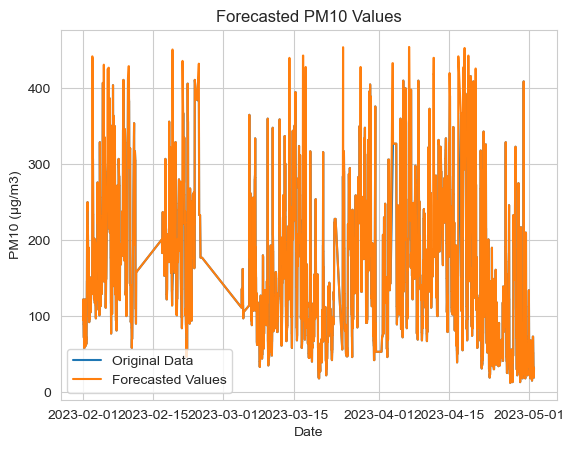

In [489]:
plt.plot(df_filled_1.index, df_filled_1['PM10 (µg/m3)'], label='Original Data')

plt.plot(df_filled.index, df_filled['PM10 (µg/m3)'], label='Forecasted Values')

plt.xlabel('Date')
plt.ylabel('PM10 (µg/m3)')
plt.title('Forecasted PM10 Values')
plt.legend()

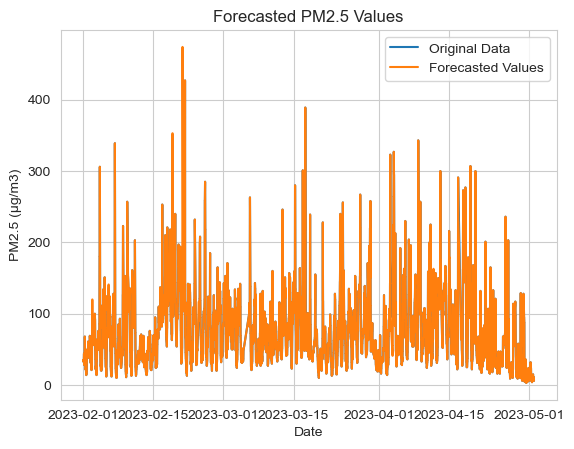

In [490]:
plt.plot(df_filled_2.index, df_filled_2['PM2.5 (µg/m3)'], label='Original Data')

plt.plot(df_filled.index, df_filled['PM2.5 (µg/m3)'], label='Forecasted Values')

plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('Forecasted PM2.5 Values')
plt.legend()

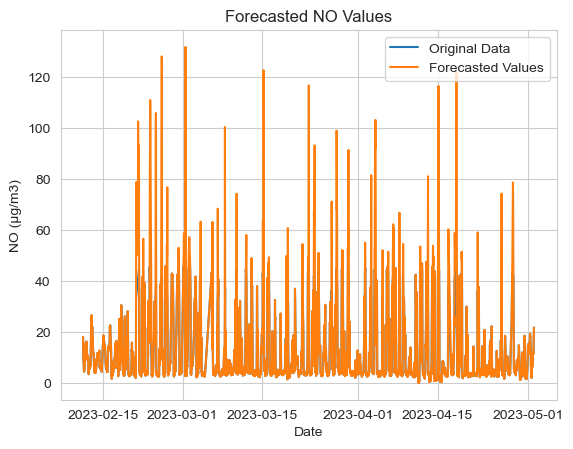

In [491]:
plt.plot(df_filled_3.index, df_filled_3['NO (µg/m3)'], label='Original Data')

plt.plot(df_filled.index, df_filled['NO (µg/m3)'], label='Forecasted Values')

plt.xlabel('Date')
plt.ylabel('NO (µg/m3)')
plt.title('Forecasted NO Values')
plt.legend()

In [492]:
forecast_table = df_filled_1[['PM10 (µg/m3)']].copy()
forecast_table.columns = ['Forecasted PM10']
forecast_table.index.name = 'Date'

forecast_table_string = forecast_table.to_string()

print(forecast_table_string)

                     Forecasted PM10
Date                                
2023-02-01 00:00:00        95.000000
2023-02-01 00:15:00        95.000000
2023-02-01 00:30:00        95.000000
2023-02-01 00:45:00       122.000000
2023-02-01 01:00:00       122.000000
2023-02-01 01:15:00       122.000000
2023-02-01 01:30:00       122.000000
2023-02-01 01:45:00        90.000000
2023-02-01 02:00:00        90.000000
2023-02-01 02:15:00        90.000000
2023-02-01 02:30:00        90.000000
2023-02-01 02:45:00        72.000000
2023-02-01 03:00:00        72.000000
2023-02-01 03:15:00        72.000000
2023-02-01 03:30:00        72.000000
2023-02-01 03:45:00        72.000000
2023-02-01 04:00:00        72.000000
2023-02-01 04:15:00        72.000000
2023-02-01 04:30:00        72.000000
2023-02-01 04:45:00        58.000000
2023-02-01 05:00:00        58.000000
2023-02-01 05:15:00        58.000000
2023-02-01 05:30:00        58.000000
2023-02-01 05:45:00        58.000000
2023-02-01 06:00:00        58.000000
2

In [493]:
forecast_table = df_filled_1[['PM2.5 (µg/m3)']].copy()
forecast_table.columns = ['Forecasted PM2.5']
forecast_table.index.name = 'Date'

forecast_table_string = forecast_table.to_string()

print(forecast_table_string)

                     Forecasted PM2.5
Date                                 
2023-02-01 00:00:00         35.000000
2023-02-01 00:15:00         35.000000
2023-02-01 00:30:00         35.000000
2023-02-01 00:45:00         34.000000
2023-02-01 01:00:00         34.000000
2023-02-01 01:15:00         34.000000
2023-02-01 01:30:00         34.000000
2023-02-01 01:45:00         35.000000
2023-02-01 02:00:00         35.000000
2023-02-01 02:15:00         35.000000
2023-02-01 02:30:00         35.000000
2023-02-01 02:45:00         32.000000
2023-02-01 03:00:00         32.000000
2023-02-01 03:15:00         32.000000
2023-02-01 03:30:00         32.000000
2023-02-01 03:45:00         44.000000
2023-02-01 04:00:00         44.000000
2023-02-01 04:15:00         44.000000
2023-02-01 04:30:00         44.000000
2023-02-01 04:45:00         28.000000
2023-02-01 05:00:00         28.000000
2023-02-01 05:15:00         28.000000
2023-02-01 05:30:00         28.000000
2023-02-01 05:45:00         33.000000
2023-02-01 0

In [494]:
forecast_table = df_filled_1[['NO (µg/m3)']].copy()
forecast_table.columns = ['Forecasted NO']
forecast_table.index.name = 'Date'

forecast_table_string = forecast_table.to_string()

print(forecast_table_string)

                     Forecasted NO
Date                              
2023-02-01 00:00:00            NaN
2023-02-01 00:15:00            NaN
2023-02-01 00:30:00            NaN
2023-02-01 00:45:00            NaN
2023-02-01 01:00:00            NaN
2023-02-01 01:15:00            NaN
2023-02-01 01:30:00            NaN
2023-02-01 01:45:00            NaN
2023-02-01 02:00:00            NaN
2023-02-01 02:15:00            NaN
2023-02-01 02:30:00            NaN
2023-02-01 02:45:00            NaN
2023-02-01 03:00:00            NaN
2023-02-01 03:15:00            NaN
2023-02-01 03:30:00            NaN
2023-02-01 03:45:00            NaN
2023-02-01 04:00:00            NaN
2023-02-01 04:15:00            NaN
2023-02-01 04:30:00            NaN
2023-02-01 04:45:00            NaN
2023-02-01 05:00:00            NaN
2023-02-01 05:15:00            NaN
2023-02-01 05:30:00            NaN
2023-02-01 05:45:00            NaN
2023-02-01 06:00:00            NaN
2023-02-01 06:15:00            NaN
2023-02-01 06:30:00 